1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


C:\Users\sych_\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


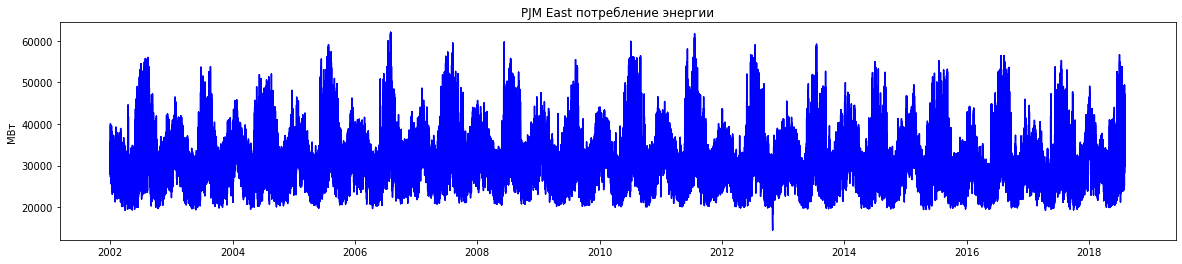

In [3]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [4]:
data_w = data.copy().resample('W').mean()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


Удалим данные о часах, праздничных днях, днях недели и днях месяца, т.к. они потеряли актуальность. Также удалим поле year, т.к. у нас нет тренда

In [5]:
data_w.drop(data_w.columns[[1,2,3,4,5,7,8,9,10,11]], axis=1,inplace=True)

In [6]:
data_w.head(10)

,PJME_MW,weekofyear
Date,,
2002-01-06,32392.160839,1.0
2002-01-13,31487.386905,2.0
2002-01-20,31452.880952,3.0
2002-01-27,30141.529762,4.0
2002-02-03,29196.488095,5.0
2002-02-10,31150.517857,6.0
2002-02-17,30616.565476,7.0
2002-02-24,29144.130952,8.0
2002-03-03,29869.011905,9.0


In [7]:
len(data_w)

866

In [8]:
ts = data_w['PJME_MW']

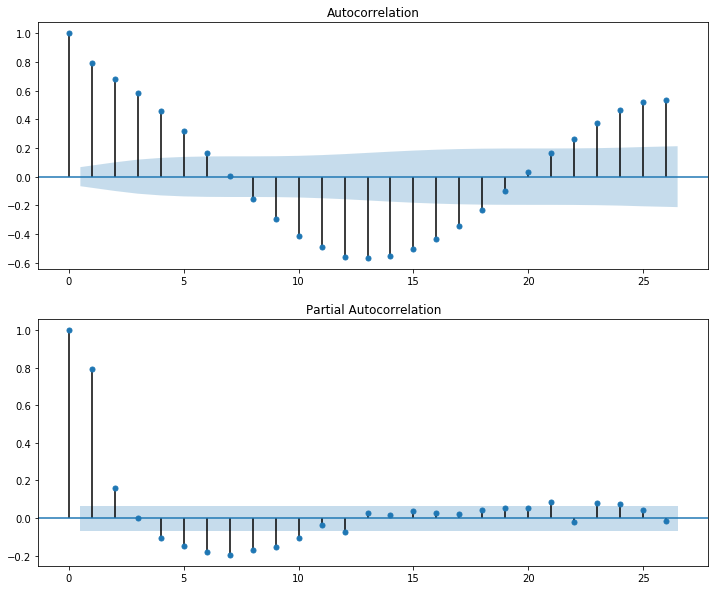

In [9]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=26, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=26, ax=ax2)

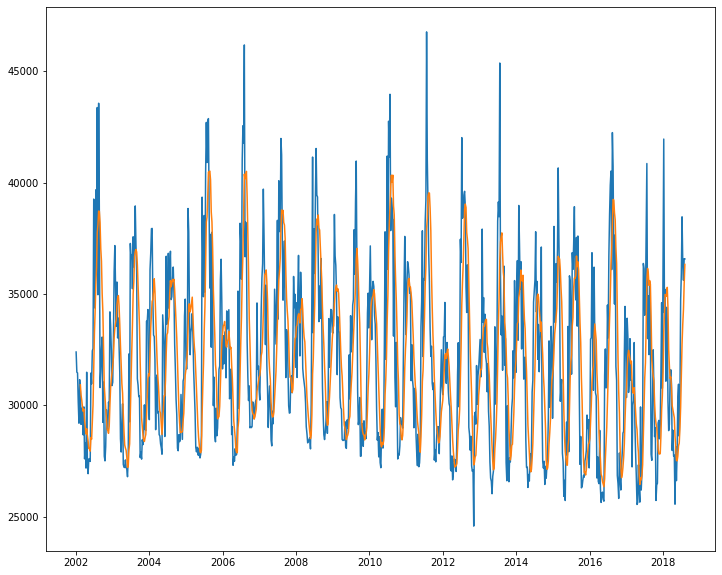

In [10]:
plt.figure(figsize=(12, 10))
ma = ts.rolling(7).mean()
plt.plot(ts)
plt.plot(ma)

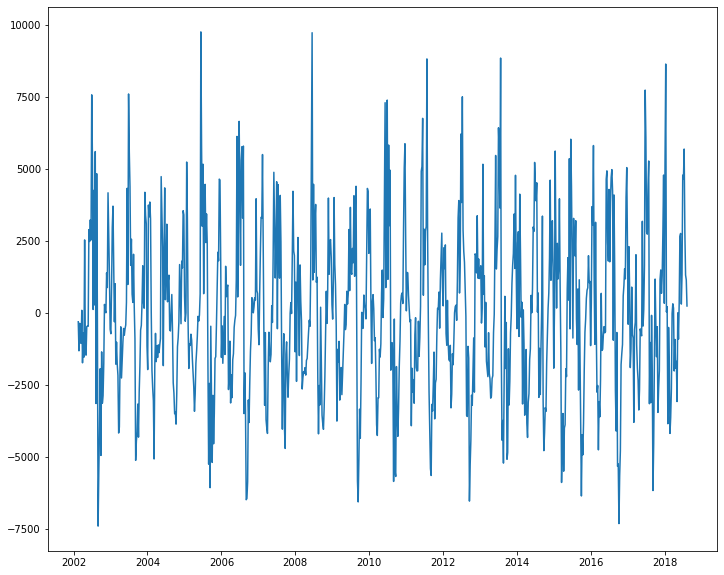

In [11]:
plt.figure(figsize=(12, 10))
ts_ma_diff = ts-ma
ts_ma_diff.dropna(inplace=True)
plt.plot(ts_ma_diff)

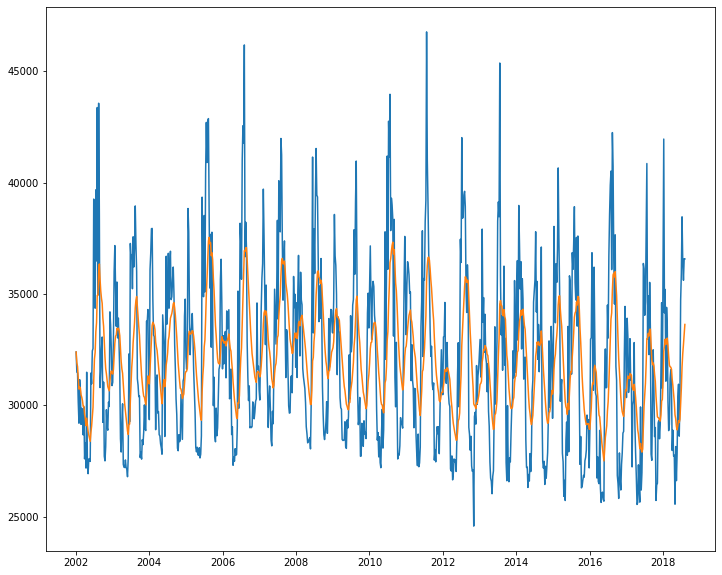

In [12]:
plt.figure(figsize=(12, 10))
exp_avg = ts.ewm(7).mean()
plt.plot(ts)
plt.plot(exp_avg)

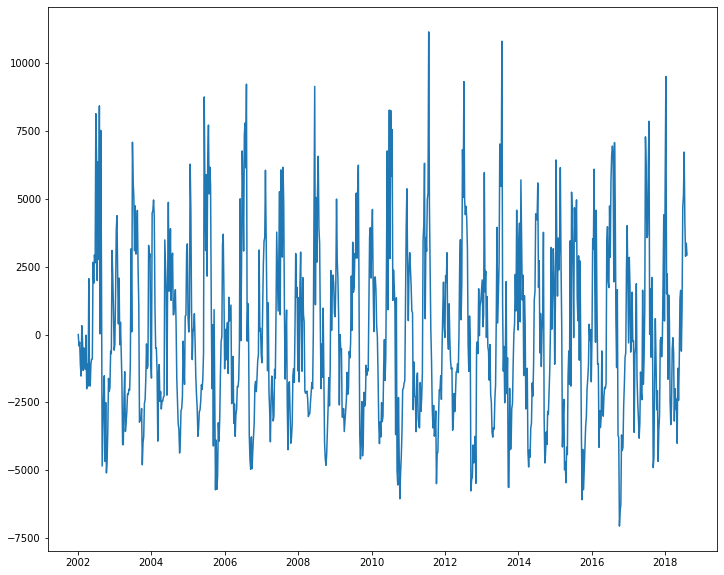

In [13]:
plt.figure(figsize=(12, 10))
ts_ewma_diff = ts-exp_avg
ts_ewma_diff.dropna(inplace=True)
plt.plot(ts_ewma_diff)

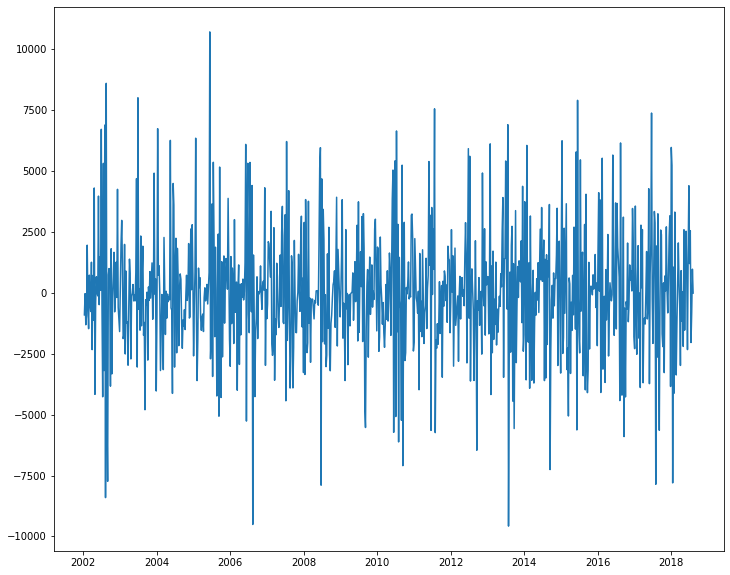

In [14]:
plt.figure(figsize=(12, 10))
ts_diff = ts - ts.shift()
ts_diff.dropna(inplace=True)
plt.plot(ts_diff)

In [15]:
from statsmodels.tsa.stattools import adfuller

def test_ts_stationarity(ts):
    ma = ts.rolling(7).mean()
    std = ts.rolling(7).std()
    plt.figure(figsize=(12, 10))
    orig = plt.plot(ts, color='blue', label='Original')
    mean = plt.plot(ma, color='red', label='Rolling mean')
    std = plt.plot(std, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling mean & std")
    plt.show()
    #adf test
    print("Results of DF test:")
    dftest = adfuller(ts, autolag='AIC')
    df_test = pd.DataFrame(dftest[:-1])
    df_test.index = ['Test statistic', 'p_value', 'lags', 'num observations', 'critical values']
    print(df_test)

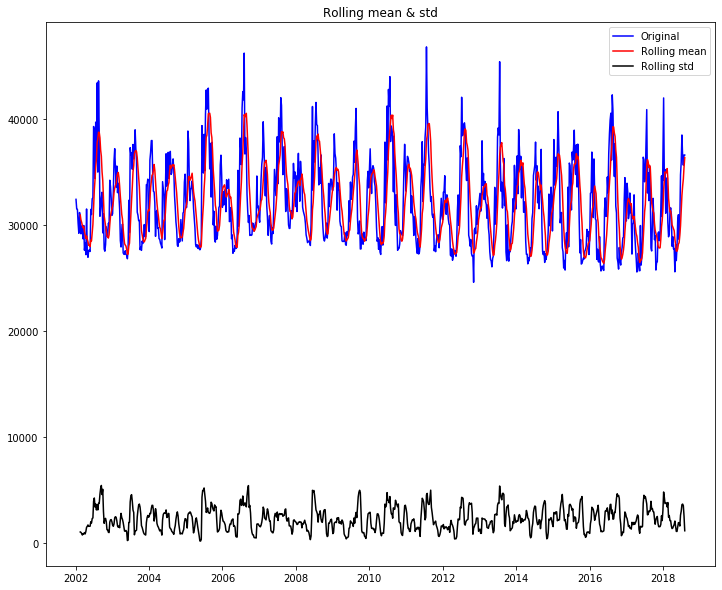

Results of DF test:
                                                                  0
Test statistic                                             -12.8073
p_value                                                 6.55772e-24
lags                                                             11
num observations                                                854
critical values   {'1%': -3.43803040357387, '5%': -2.86493029595...


In [16]:
test_ts_stationarity(ts)

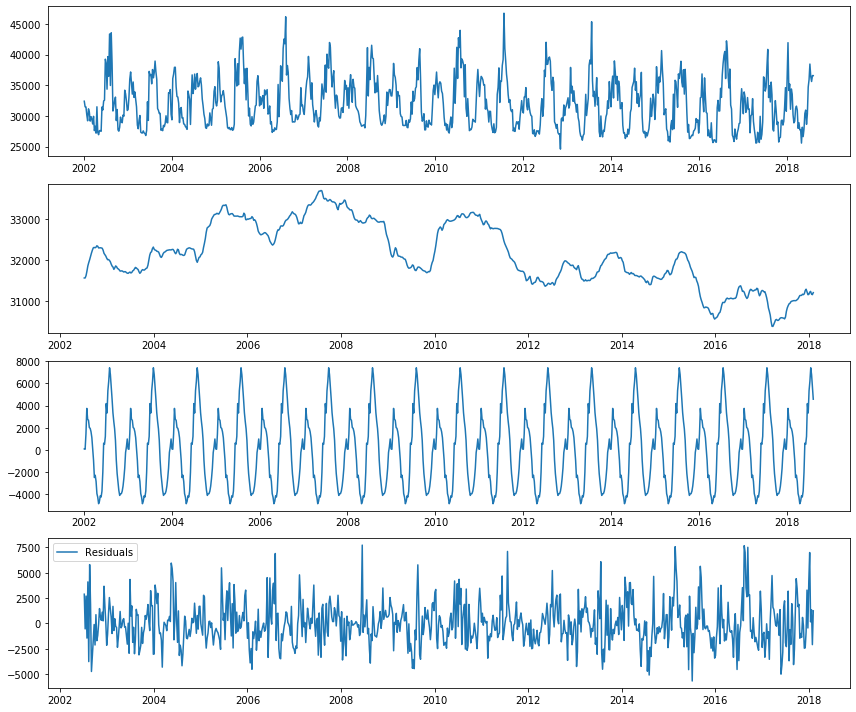

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(ts)
trend = dec.trend
seasonal = dec.seasonal
residuals = dec.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [18]:
import warnings
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_w['PJME_MW'].values[:-12],order=[6,1,2],
                                seasonal_order=[0,1,2,52] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 12733.727103621888


In [21]:
len(data_w)

866

In [26]:
preds.shape

(13,)

In [29]:
data_w.index[-12:].shape

(12,)

In [28]:
start = 854
end = 865
preds = results_opt.predict(start=start, end=end, typ='levels')

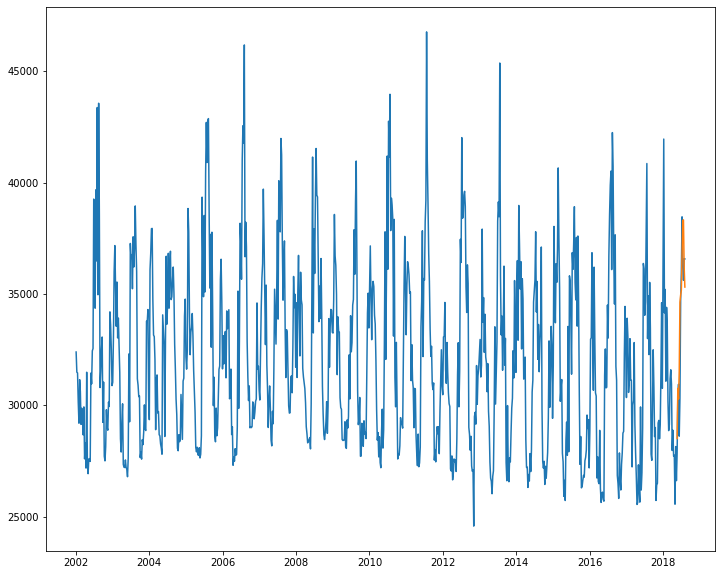

In [30]:
plt.figure(figsize=(12, 10))
plt.plot(data_w.index, data_w['PJME_MW'].values)
plt.plot(data_w.index[-12:],preds)